In [4]:
pip install -U imbalanced-learn

  Using cached imbalanced_learn-0.9.1-py3-none-any.whl (199 kB)
Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns #Visualization
import matplotlib.pyplot as plt #Visualization
from sklearn.preprocessing import StandardScaler #Standardization
from sklearn.model_selection import train_test_split #Spliting
from sklearn.neighbors import KNeighborsClassifier #KNN Classifier
from sklearn.metrics import confusion_matrix 
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier

In [3]:
applications = pd.read_csv('application_record.csv')
credit_record = pd.read_csv('credit_record.csv')

In [4]:
applications.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [6]:
applications.head(10)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
5,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
6,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
7,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0
8,5008813,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0
9,5008814,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0


In [7]:
applications.FLAG_MOBIL.value_counts()

1    438557
Name: FLAG_MOBIL, dtype: int64

In [8]:
credit_record.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [9]:
credit_record.head(10)

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
5,5001712,-1,C
6,5001712,-2,C
7,5001712,-3,C
8,5001712,-4,C
9,5001712,-5,C


In [10]:
credit_record.STATUS.value_counts()

C    442031
0    383120
X    209230
1     11090
5      1693
2       868
3       320
4       223
Name: STATUS, dtype: int64

In [11]:
applications.drop(columns = ['FLAG_MOBIL'],inplace=True)
applications.dropna(subset=['OCCUPATION_TYPE'],inplace=True)
applications.drop_duplicates(subset=applications.columns[1:],inplace=True)

In [12]:
credit_record['STATUS'] = np.where((credit_record['STATUS'] == '2') | (credit_record['STATUS'] == '3' ) | (credit_record['STATUS'] == '4' )| (credit_record['STATUS'] == '5'), 1, 0)

In [13]:
credit_record.STATUS.value_counts()

0    1045471
1       3104
Name: STATUS, dtype: int64

In [14]:
credit_classified = pd.DataFrame(pd.unique(credit_record.ID),columns = ['ID'])

In [15]:
credit_classified.head()

,ID
0,5001711
1,5001712
2,5001713
3,5001714
4,5001715


In [18]:
credit_classified['Max_Mnth_Good'] = [max(credit_record[(credit_record.ID == i) 
                                                        & (credit_record.STATUS == 0)].MONTHS_BALANCE) for i in credit_classified.ID]
credit_classified['Max_Mnth_Bad'] = [max(credit_record[(credit_record.ID == i) 
                                                       & (credit_record.STATUS == 1)].MONTHS_BALANCE ,default=1) for i in credit_classified.ID]
credit_classified['Status'] = ["Good" if (credit_classified.Max_Mnth_Good.iloc[i] > credit_classified.Max_Mnth_Bad.iloc[i]) 
                               or (credit_classified.Max_Mnth_Bad.iloc[i] == 1) 
                               else "Bad" for i in range(len(credit_classified.ID))]

In [19]:
credit_classified.Status.value_counts()

Good    45873
Bad       112
Name: Status, dtype: int64

In [20]:
merged_data = pd.merge(applications, credit_classified, how = "inner" , on='ID')

In [21]:
merged_data.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,Max_Mnth_Good,Max_Mnth_Bad
count,6.715000e+03,6715.000000,6.715000e+03,6715.000000,6715.000000,6715.000000,6715.000000,6715.000000,6715.000000,6715.000000,6715.000000
mean,5.076510e+06,0.508116,1.896064e+05,-14769.037081,-2485.386299,0.266567,0.286969,0.097096,2.282353,-5.743708,0.593745
std,4.091949e+04,0.819438,1.022247e+05,3529.228015,2299.573276,0.442197,0.452381,0.296111,0.976996,11.381815,3.611201
min,5.008806e+06,0.000000,2.700000e+04,-24611.000000,-15713.000000,0.000000,0.000000,0.000000,1.000000,-59.000000,-50.000000
25%,5.036962e+06,0.000000,1.260000e+05,-17448.000000,-3350.500000,0.000000,0.000000,0.000000,2.000000,-6.000000,1.000000
50%,5.078898e+06,0.000000,1.665000e+05,-14548.000000,-1788.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000
75%,5.113032e+06,1.000000,2.250000e+05,-11919.500000,-859.000000,1.000000,1.000000,0.000000,3.000000,0.000000,1.000000
max,5.150467e+06,19.000000,1.575000e+06,-7489.000000,-17.000000,1.000000,1.000000,1.000000,20.000000,0.000000,1.000000


In [22]:
def dropOL(ftr):
    q75,q25 = np.percentile(merged_data[ftr],[75,25])
    intr_qr = q75-q25
    mx = q75+(1.5*intr_qr)
    mn = q25-(1.5*intr_qr)
    return mx,mn

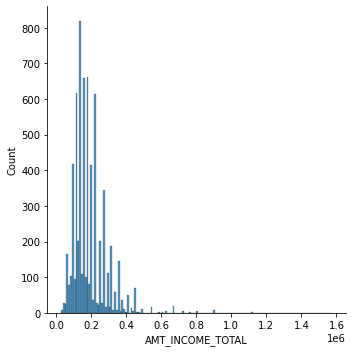

In [23]:
sns.displot(merged_data, x="AMT_INCOME_TOTAL")

<AxesSubplot:>

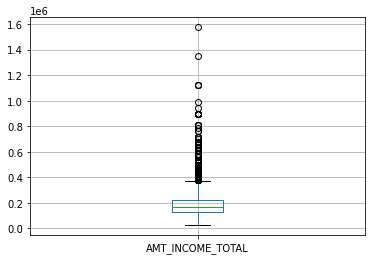

In [25]:
merged_data.boxplot('AMT_INCOME_TOTAL')

In [26]:
mx, mn = dropOL('AMT_INCOME_TOTAL')

In [27]:
merged_data.drop(merged_data[merged_data.AMT_INCOME_TOTAL > mx].index,inplace=True)

<AxesSubplot:>

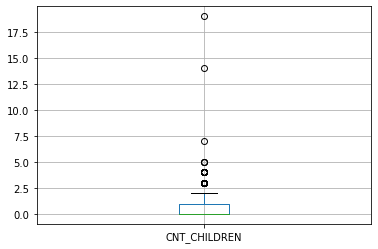

In [28]:
merged_data.boxplot('CNT_CHILDREN')

In [29]:
merged_data.drop(merged_data[merged_data.CNT_CHILDREN > 4].index,inplace=True)

<AxesSubplot:>

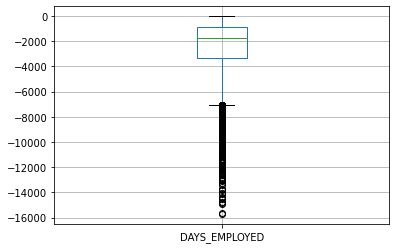

In [30]:
merged_data.boxplot('DAYS_EMPLOYED')

In [31]:
mx,mn = dropOL('DAYS_EMPLOYED')

In [32]:
merged_data.drop(merged_data[merged_data.DAYS_EMPLOYED > mx].index,inplace=True)

<AxesSubplot:>

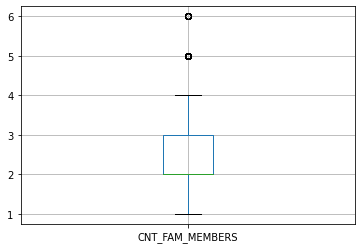

In [33]:
merged_data.boxplot('CNT_FAM_MEMBERS')

In [35]:
mx,mn = dropOL('CNT_FAM_MEMBERS')

In [36]:
merged_data.drop(merged_data[merged_data.CNT_FAM_MEMBERS > 6].index,inplace=True)

In [37]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6427 entries, 0 to 6714
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   6427 non-null   int64  
 1   CODE_GENDER          6427 non-null   object 
 2   FLAG_OWN_CAR         6427 non-null   object 
 3   FLAG_OWN_REALTY      6427 non-null   object 
 4   CNT_CHILDREN         6427 non-null   int64  
 5   AMT_INCOME_TOTAL     6427 non-null   float64
 6   NAME_INCOME_TYPE     6427 non-null   object 
 7   NAME_EDUCATION_TYPE  6427 non-null   object 
 8   NAME_FAMILY_STATUS   6427 non-null   object 
 9   NAME_HOUSING_TYPE    6427 non-null   object 
 10  DAYS_BIRTH           6427 non-null   int64  
 11  DAYS_EMPLOYED        6427 non-null   int64  
 12  FLAG_WORK_PHONE      6427 non-null   int64  
 13  FLAG_PHONE           6427 non-null   int64  
 14  FLAG_EMAIL           6427 non-null   int64  
 15  OCCUPATION_TYPE      6427 non-null   o

In [38]:
xData = merged_data[merged_data.columns[1:-3]]
yData = merged_data[merged_data.columns[-1]]

In [39]:
yData.value_counts()

Good    6404
Bad       23
Name: Status, dtype: int64

In [40]:
xData = pd.get_dummies(xData,drop_first=True)

In [41]:
'''
std = StandardScaler()
std.fit(xData)
xScal = std.transform(xData)
xScal  = pd.DataFrame(xScal,columns=xData.columns)
xScal.head(10)
'''

'\nstd = StandardScaler()\nstd.fit(xData)\nxScal = std.transform(xData)\nxScal  = pd.DataFrame(xScal,columns=xData.columns)\nxScal.head(10)\n'

In [42]:
rndm_stat = [train_test_split(xData,yData,random_state=x) for x in range(100)]
badCounts = [rndm_stat[i][3].value_counts()['Bad'] for i in range(100)]
bstRndmStat = badCounts.index(4,8)
bstRndmStat

11

In [43]:
X_train, X_test, y_train, y_test = train_test_split(xData,yData,random_state=bstRndmStat)

In [44]:
tl = TomekLinks(sampling_strategy='majority')
x_tl, y_tl = tl.fit_resample(X_train,y_train)
print('Original dataset shape', y_train.value_counts())
print('Resample dataset shape', y_tl.value_counts())

Original dataset shape Good    4801
Bad       19
Name: Status, dtype: int64
Resample dataset shape Good    4791
Bad       19
Name: Status, dtype: int64


In [46]:
smote = SMOTE()
x_smote, y_smote = smote.fit_resample(x_tl, y_tl)
print('Original dataset shape', y_tl.value_counts())
print('Resample dataset shape', y_smote.value_counts())

Original dataset shape Good    4791
Bad       19
Name: Status, dtype: int64
Resample dataset shape Good    4791
Bad     4791
Name: Status, dtype: int64


In [47]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_smote, y_smote)
y_pred = knn.predict(X_test)
print(knn.score(X_test, y_test))
confusion_matrix(y_test, y_pred)

0.9508400746733043


array([[   2,    2],
       [  77, 1526]], dtype=int64)

In [48]:
'''
rndSt = TN = 10
for i in range(100):
    clf = RandomForestClassifier(max_depth=2, random_state=i)
    clf.fit(x_smote, y_smote)
    y_pred = clf.predict(X_test)
    if confusion_matrix(y_test, y_pred)[0][0] > TN:
        TN = confusion_matrix(y_test, y_pred)[0][0]
        rndSt = i

print(clf.score(X_test, y_test))
'''

'\nrndSt = TN = 10\nfor i in range(100):\n    clf = RandomForestClassifier(max_depth=2, random_state=i)\n    clf.fit(x_smote, y_smote)\n    y_pred = clf.predict(X_test)\n    if confusion_matrix(y_test, y_pred)[0][0] > TN:\n        TN = confusion_matrix(y_test, y_pred)[0][0]\n        rndSt = i\n\nprint(clf.score(X_test, y_test))\n'

In [49]:
clf = RandomForestClassifier(max_depth=2, random_state=10)
clf.fit(x_smote, y_smote)
y_pred = clf.predict(X_test)
print(clf.score(X_test, y_test))
confusion_matrix(y_test, y_pred)

0.776602364654636


array([[   1,    3],
       [ 356, 1247]], dtype=int64)

In [50]:
def plot_feature_importance(importance,names,model_type):

#Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

#Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

#Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

#Define size of bar plot
    plt.figure(figsize=(10,15))
#Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
#Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

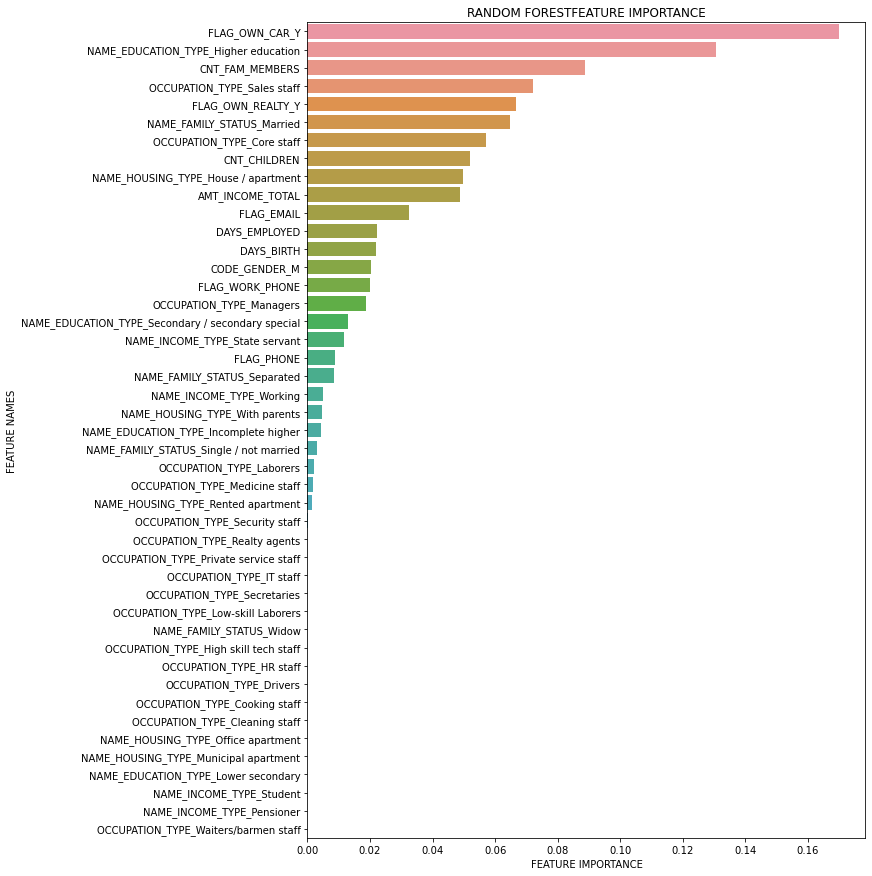

In [51]:
plot_feature_importance(clf.feature_importances_,X_train.columns,'RANDOM FOREST')